# Análisis Morfológico de Corpus de Canciones con NLTK

Este notebook realiza un análisis morfológico completo de un corpus de letras de canciones con etiquetado POS.

## 1. Importar librerías y cargar datos


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from src.utils import path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")
#plt.rcParams['figure.figsize'] = (12, 6)
#plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [13]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\results\\corpus_spotify_nltk.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,pos_tags_lower,pos_tags_lemma
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[['Look', 'at', 'her', 'face', ',', 'it', ""'s""...","[[('Look', 'NN'), ('at', 'IN'), ('her', 'PRP$'...","[[('Look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[['Take', 'it', 'easy', 'with', 'me', ',', 'pl...","[[('Take', 'VB'), ('it', 'PRP'), ('easy', 'JJ'...","[[('Take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[['I', ""'ll"", 'never', 'know', 'why', 'I', 'ha...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy..."


## 2. Funciones auxiliares para procesamiento

In [14]:
def extraer_pos_tags(pos_string):
    """
    Extrae las etiquetas POS de una cadena de texto.
    Ejemplo: "[[(Look, NN), (at, IN)]]" -> ['NN', 'IN']
    """
    if pd.isna(pos_string):
        return []

    # Extraer etiquetas usando regex
    tags = re.findall(r',\s*([A-Z$]+)\)', str(pos_string))
    return tags

def extraer_palabras(tokens_string):
    """
    Extrae palabras de una lista de tokens.
    """
    if pd.isna(tokens_string):
        return []

    # Extraer palabras
    palabras = re.findall(r"'([^']+)'", str(tokens_string))
    return palabras

def contar_palabras(texto):
    """Cuenta palabras en un texto."""
    if pd.isna(texto):
        return 0
    return len(str(texto).split())

def calcular_type_token_ratio(palabras):
    """Calcula la riqueza léxica (types/tokens)."""
    if not palabras or len(palabras) == 0:
        return 0
    types = len(set(palabras))
    tokens = len(palabras)
    return types / tokens if tokens > 0 else 0

print("✓ Funciones auxiliares definidas")

✓ Funciones auxiliares definidas


In [15]:
# Procesar las columnas de POS tags
print("Procesando etiquetas POS...")

df['pos_list'] = df['Etiquetado_POS'].apply(extraer_pos_tags)
df['tokens_list'] = df['tokens'].apply(extraer_palabras)
df['num_palabras'] = df['letra_cancion'].apply(contar_palabras)
df['num_tokens'] = df['tokens_list'].apply(len)
df['ttr'] = df['tokens_list'].apply(calcular_type_token_ratio)

print("✓ Procesamiento completado")
print(f"\nTotal de canciones: {len(df)}")
print(f"Total de artistas: {df['musico'].nunique()}")

Procesando etiquetas POS...
✓ Procesamiento completado

Total de canciones: 57650
Total de artistas: 643


## 3. Estadísticas Descriptivas Básicas

In [16]:
# Resumen estadístico por artista
stats_por_artista = df.groupby('musico').agg({
    'nombre_cancion': 'count',
    'num_palabras': ['mean', 'median', 'std'],
    'num_tokens': ['mean', 'median'],
    'ttr': ['mean', 'median']
}).round(2)

stats_por_artista.columns = ['_'.join(col).strip() for col in stats_por_artista.columns.values]
stats_por_artista = stats_por_artista.rename(columns={'nombre_cancion_count': 'num_canciones'})

print("Estadísticas por artista:")
stats_por_artista

Estadísticas por artista:


,num_canciones,num_palabras_mean,num_palabras_median,num_palabras_std,num_tokens_mean,num_tokens_median,ttr_mean,ttr_median
musico,,,,,,,,
'n Sync,93,269.57,269.0,98.87,304.12,298.0,0.28,0.25
ABBA,113,250.43,247.0,89.78,275.21,270.0,0.29,0.28
Ace Of Base,74,240.96,242.5,77.46,262.51,258.5,0.28,0.25
Adam Sandler,70,261.11,253.5,118.05,317.93,291.5,0.29,0.29
Adele,54,292.22,285.5,93.36,325.63,310.5,0.26,0.23
...,...,...,...,...,...,...,...,...
Zoegirl,38,257.50,223.5,96.07,284.55,253.0,0.31,0.30
Zornik,12,160.33,148.0,39.28,172.83,165.5,0.31,0.33
Zox,21,261.95,240.0,70.99,291.38,255.0,0.27,0.28


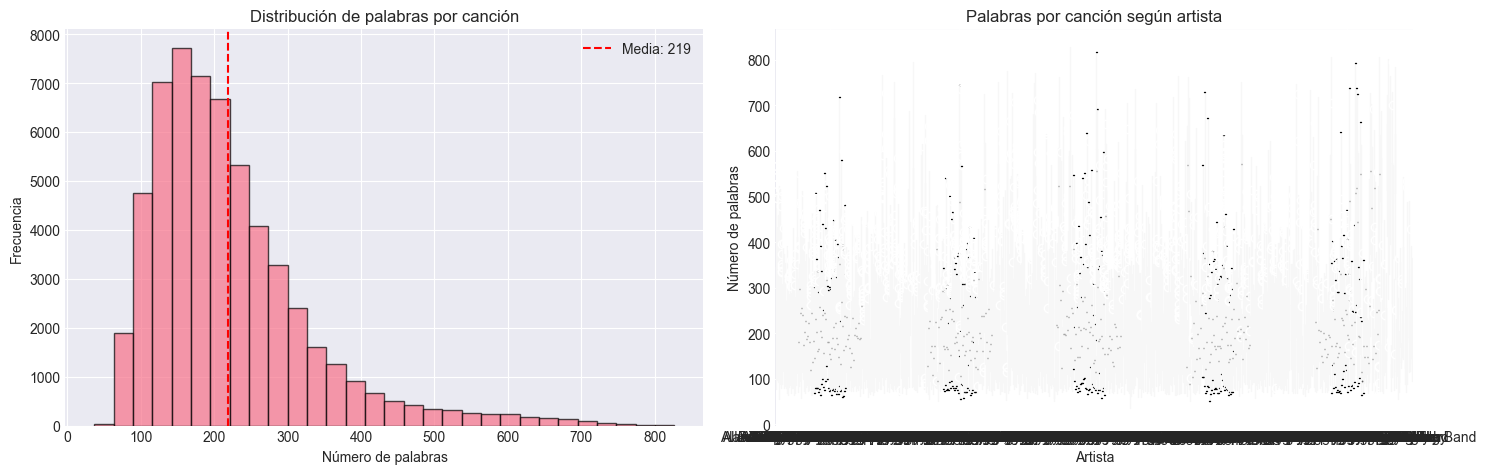

In [17]:
# Visualización de distribución de palabras por canción
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df['num_palabras'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Número de palabras')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de palabras por canción')
axes[0].axvline(df['num_palabras'].mean(), color='red', linestyle='--', label=f'Media: {df["num_palabras"].mean():.0f}')
axes[0].legend()

# Boxplot por artista
df.boxplot(column='num_palabras', by='musico', ax=axes[1])
axes[1].set_xlabel('Artista')
axes[1].set_ylabel('Número de palabras')
axes[1].set_title('Palabras por canción según artista')
plt.suptitle('')

plt.tight_layout()
plt.show()